# XAI Project Work

# Dataset

### Importazione

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import shap
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer

import warnings
warnings.filterwarnings('ignore')

In [34]:
path_white = "/Users/hannaaro/Desktop/GitHub/XAI/winequality-white.csv"
path_red = "/Users/hannaaro/Desktop/GitHub/XAI/winequality-red.csv"

white_data = pd.read_csv(path_white, sep = ";")
red_data = pd.read_csv(path_red, sep = ";")

### Descrizione e missing data

In [35]:
print(f'Il dataset dei vini bianchi ha {len(white_data)} righe.\nIl dataset dei vini rossi ha {len(red_data)} righe.')

Il dataset dei vini bianchi ha 4898 righe.
Il dataset dei vini rossi ha 1599 righe.


In [36]:
red_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [37]:
white_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [38]:
white_data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4191,7.8,0.27,0.35,1.2,0.050,36.0,140.0,0.99138,3.09,0.45,11.2,5
2509,8.0,0.27,0.57,10.4,0.053,18.0,134.0,0.99732,3.12,0.68,9.0,5
4438,6.1,0.21,0.19,1.4,0.046,51.0,131.0,0.99184,3.22,0.39,10.5,5
3350,7.2,0.22,0.28,7.2,0.060,41.0,132.0,0.99350,3.08,0.59,11.3,6
3057,7.2,0.27,0.37,5.4,0.026,27.0,114.0,0.99174,3.13,0.84,12.7,5


In [39]:
red_data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1169,7.6,0.500,0.29,2.3,0.086,5.0,14.0,0.99502,3.32,0.62,11.5,6
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9,6
853,9.3,0.360,0.39,1.5,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,6
746,8.2,0.340,0.38,2.5,0.080,12.0,57.0,0.99780,3.30,0.47,9.0,6
1484,6.8,0.910,0.06,2.0,0.060,4.0,11.0,0.99592,3.53,0.64,10.9,4


In [40]:
red_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [41]:
white_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Non si osservano valori mancanti nelle variabili osservate.

### Concatenazione

Concateniamo i due dataset white_data e red_data, riferiti ai vini bianchi e rossi, rispettivamente.

In [42]:
white_data['tipo'] = "white"
white_data.sample(5)

red_data['tipo'] = "red"
red_data.sample(5)

wine = pd.concat([white_data, red_data])

wine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo
3062,6.8,0.280,0.43,7.6,0.030,30.0,110.0,0.99164,3.08,0.59,12.5,8,white
1131,5.9,0.190,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,5,red
1755,6.3,0.250,0.23,14.9,0.039,47.0,142.0,0.99705,3.14,0.35,9.7,6,white
2905,7.6,0.310,0.26,1.7,0.073,40.0,157.0,0.99380,3.10,0.46,9.8,5,white
1418,7.8,0.530,0.01,1.6,0.077,3.0,19.0,0.99500,3.16,0.46,9.8,5,red
3233,6.2,0.200,0.29,11.8,0.035,21.0,93.0,0.99364,3.18,0.34,11.9,6,white
1082,6.3,0.270,0.25,5.8,0.038,52.0,155.0,0.99500,3.28,0.38,9.4,6,white
97,8.6,0.265,0.36,1.2,0.034,15.0,80.0,0.99130,2.95,0.36,11.4,7,white
1087,7.9,0.190,0.42,1.6,0.057,18.0,30.0,0.99400,3.29,0.69,11.2,6,red
1213,9.6,0.380,0.42,1.9,0.071,5.0,13.0,0.99659,3.15,0.75,10.5,6,red


In [43]:
wine.value_counts("tipo")

tipo
white    4898
red      1599
Name: count, dtype: int64

In [44]:
wine.value_counts("quality")

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [45]:
wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

### Ricodifica di *quality* tramite *vote*

Ricodifichiamo la feature target *quality* in:
- **bad** se $ 0 \leq quality \leq 5 $

- **good** se $ quality \geq 6 $

Notiamo dalla riga precedente che *quality* assume 7 valori: 3 di questi verrano ricodificati come Bad e 4 come Good.

In [46]:
wine['vote'] = np.where(wine['quality'] < 6, 'Bad', 'Good')

wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo,vote
111,8.4,0.620,0.09,2.2,0.084,11.0,108.0,0.99640,3.15,0.66,9.8,5,red,Bad
1042,7.3,0.490,0.32,5.2,0.043,18.0,104.0,0.99520,3.24,0.45,10.7,4,white,Bad
1124,9.6,0.230,0.40,1.5,0.044,19.0,135.0,0.99370,2.96,0.49,10.9,5,white,Bad
4717,4.8,0.225,0.38,1.2,0.074,47.0,130.0,0.99132,3.31,0.40,10.3,6,white,Good
2512,5.6,0.175,0.29,0.8,0.043,20.0,67.0,0.99112,3.28,0.48,9.9,6,white,Good


### Exploratory and Visualization

#### Conteggio di *vote* raggruppando per *tipo*

In [47]:
wine.groupby('tipo')['vote'].value_counts(normalize = True)

tipo   vote
red    Good    0.534709
       Bad     0.465291
white  Good    0.665169
       Bad     0.334831
Name: proportion, dtype: float64

#### Distribuzione di frequenza dei voti, per vino bianco e rosso

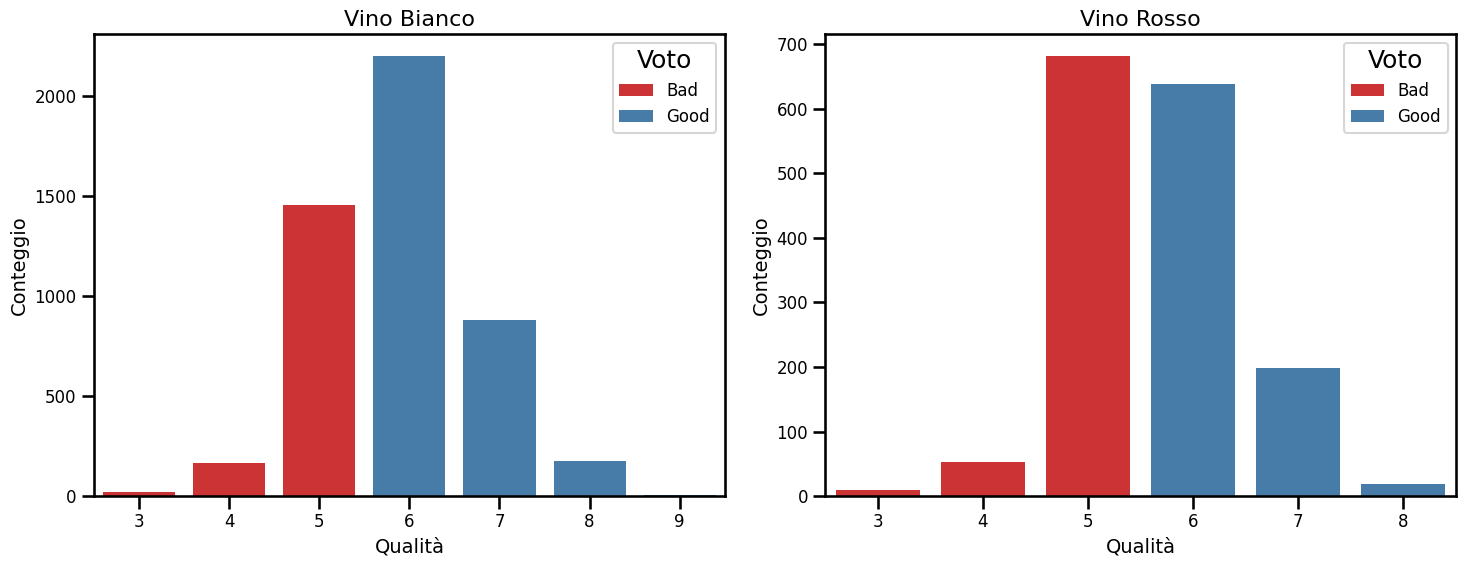

In [48]:
import seaborn as sns
# Creazione dei dataframe separati per il vino bianco e rosso
df_white = wine[wine['tipo'] == 'white']
df_red = wine[wine['tipo'] == 'red']

# Creazione dei grafici a barre per il vino bianco e rosso
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Grafico per il vino bianco
sns.countplot(x='quality', hue='vote', data=df_white, palette='Set1', ax=axes[0], hue_order=['Bad', 'Good'])
axes[0].set_title('Vino Bianco', fontsize=16)
axes[0].set_xlabel('Qualità', fontsize=14)
axes[0].set_ylabel('Conteggio', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].legend(title='Voto', fontsize=12)

# Grafico per il vino rosso
sns.countplot(x='quality', hue='vote', data=df_red, palette='Set1', ax=axes[1], hue_order=['Bad', 'Good'])
axes[1].set_title('Vino Rosso', fontsize=16)
axes[1].set_xlabel('Qualità', fontsize=14)
axes[1].set_ylabel('Conteggio', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].legend(title='Voto', fontsize=12)

plt.tight_layout()
plt.show()

# Random Forest

### Preprocessing 

Procediamo con il preprocessing dei dati al fine di allenare poi una Random Forest su di essi. 

Eseguiamo una codifica della variabile *tipo := red, white* 

In [49]:
#Encoding della variabile "tipo" trasformandola in 1-0 
tipo_encoded_2 = wine['tipo'].apply(lambda x: 1 if x == "white" else 0) #1 = bianco e 0 = rosso
tipo_encoded_2.sample(5)

311     0
1424    1
2956    1
4023    1
1809    1
Name: tipo, dtype: int64

In [50]:
#Aggiungiamo la colonna tipo codificata 1-0 a wine2
wine2 = wine
wine2['tipo'] = tipo_encoded_2
wine2.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo,vote
4436,6.7,0.28,0.28,4.50,0.051,14.0,92.0,0.99224,3.36,0.58,11.900000,6,1,Good
4383,6.5,0.13,0.27,2.60,0.035,32.0,76.0,0.99140,3.21,0.76,11.333333,6,1,Good
1009,9.6,0.50,0.36,2.80,0.116,26.0,55.0,0.99722,3.18,0.68,10.900000,5,0,Bad
3653,6.3,0.32,0.17,17.75,0.060,51.0,190.0,0.99916,3.13,0.48,8.800000,6,1,Good
2542,8.9,0.27,0.34,10.70,0.029,19.5,166.0,0.99669,3.13,0.48,10.600000,5,1,Bad


In [51]:
#Definizione delle feature che verrano impiegate per allenare la random forest
feature_cols = [
  'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'tipo'
]

#Variabile target: vote
target_col = 'vote'

#Matrice dei dati X
X = wine2[feature_cols]

#Vettore della variabile target (ricodificata tramite lambda function)
y = wine2[target_col].apply(lambda x: 1 if x == 'Good' else 0) # 1 = Good e 0 = Bad 

#Split in dati di training e test, con ampiezza del test pari al 20% del totale
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

#Specifica delle feature numeriche per preprocessing ad hoc 
numeric_features = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'
]

#Specifica della trasformazione da attuare sulle numeriche (standardizzazione: sottrazione della media e divisione per la std dev)
numeric_transformer = StandardScaler()

#Specifica delle feature categoriali per preprocessing ad hoc 
categorical_features = [
    'tipo'
]

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

#"Aggregazione" delle trasformazioni
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
])

In [52]:
features = X_test.columns
print(features)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'tipo'],
      dtype='object')


### Fit

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Creiamo una pipeline con il preprocessor e il Random Forest classifier
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',
                       RandomForestClassifier(random_state=42, n_jobs=-1))])

# Addestriamo il modello Random Forest
clf.fit(X_train, y_train)

# Previsioni sul dataset di training
y_pred = clf.predict(X_test)

# Metriche di valutazione
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n {conf_matrix}')

Accuracy: 0.8453846153846154
Precision: 0.8769414575866189
Recall: 0.8822115384615384
F1 Score: 0.8795686039544638
Confusion Matrix:
 [[365 103]
 [ 98 734]]


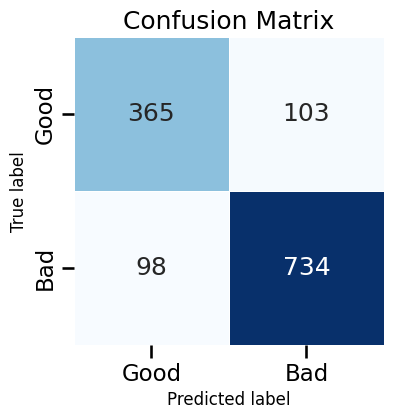

In [54]:
class_names = ['Good', 'Bad'] 

conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=class_names,
                              columns=class_names)

sns.set_context('talk')

# Creiamo una heatmap
plt.figure(figsize=(4, 4))
heatmap = sns.heatmap(conf_matrix_df,
                      annot=True,
                      fmt='d',
                      cmap='Blues',
                      linewidths=.5,
                      cbar=False)

plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.title('Confusion Matrix')
plt.show()

# Variable Importance

Ri-standardizziamo i dati (le feature numeriche) tramite StadardScaler (la categoriale *tipo* è già encoded 1-0).

In [55]:
# Train

#Specifica del transformer
scaler = StandardScaler()

#Estrazione delle numeriche
numeric_cols = X_train.select_dtypes(include=['number'])
numeric_cols = numeric_cols.drop('tipo',axis=1) #drop della categoriale

#Standardizzazione delle colonne
numeric_cols_std = scaler.fit_transform(numeric_cols)

X_train_std = X_train
 
#Sostituzione delle varaibile originali (numeriche) con quelle standardizzate
X_train_std[numeric_cols.columns] = numeric_cols_std

#Verifica
X_train_std.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,tipo
count,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5197.000000
mean,2.560114e-16,-4.272553e-17,-2.474663e-16,4.101651e-18,6.836086e-17,6.152477e-17,9.912324e-17,-1.108300e-14,1.456428e-15,-5.494504e-16,-6.576314e-16,0.752742
std,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,0.431460
min,-2.619604e+00,-1.568939e+00,-2.201246e+00,-1.008730e+00,-1.378582e+00,-1.656399e+00,-1.936811e+00,-2.517672e+00,-3.095821e+00,-2.009155e+00,-2.091586e+00,0.000000
25%,-6.310693e-01,-6.637283e-01,-4.782589e-01,-7.578288e-01,-5.264991e-01,-7.583501e-01,-6.827079e-01,-7.811150e-01,-6.737542e-01,-6.850142e-01,-8.334400e-01,1.000000
50%,-1.721767e-01,-3.016440e-01,-6.474213e-02,-5.278362e-01,-2.620595e-01,-8.481312e-02,4.149221e-02,6.054956e-02,-5.271155e-02,-1.553579e-01,-1.624289e-01,1.000000
75%,3.631980e-01,3.621772e-01,4.866136e-01,5.594020e-01,2.668199e-01,5.887238e-01,7.127021e-01,7.392040e-01,6.304354e-01,4.405055e-01,6.763349e-01,1.000000
max,6.634730e+00,7.483168e+00,9.239386e+00,1.262356e+01,1.630949e+01,1.450849e+01,5.729113e+00,1.473146e+01,4.915630e+00,9.577077e+00,3.695885e+00,1.000000


In [56]:
# Test

#Specifica del transformer
scaler = StandardScaler()

#Estrazione delle numeriche
numeric_cols_test = X_test.select_dtypes(include=['number']) 
numeric_cols_test = numeric_cols_test.drop('tipo',axis=1) #drop della categoriale

#Standardizzazione delle colonne
numeric_cols_std_test = scaler.fit_transform(numeric_cols_test)

X_test_std = X_test
 
#Sostituzione delle varaibile originali (numeriche) con quelle standardizzate
X_test_std[numeric_cols_test.columns] = numeric_cols_std_test

#Verifica
X_test_std.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,tipo
count,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1300.000000
mean,3.914817e-16,-1.229786e-16,-2.295600e-16,9.564998e-18,-1.366428e-17,-9.974927e-17,7.447034e-17,-3.258932e-14,-5.208825e-15,-3.443399e-16,-7.242070e-16,0.758462
std,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,0.428181
min,-2.620967e+00,-1.612806e+00,-2.160070e+00,-1.056725e+00,-1.122207e+00,-1.635896e+00,-1.926298e+00,-2.554109e+00,-2.994839e+00,-2.174514e+00,-2.080480e+00,0.000000
25%,-6.208866e-01,-6.765515e-01,-5.173912e-01,-7.988865e-01,-5.029598e-01,-7.773775e-01,-6.435110e-01,-8.190738e-01,-6.949863e-01,-6.648572e-01,-8.243526e-01,1.000000
50%,-1.408672e-01,-3.020499e-01,-3.827652e-02,-4.873315e-01,-2.707421e-01,-9.056269e-02,3.351556e-02,8.381812e-02,-1.161119e-01,-1.616383e-01,-1.544178e-01,1.000000
75%,3.391522e-01,4.469533e-01,5.092831e-01,6.407124e-01,2.452974e-01,6.534866e-01,7.105421e-01,8.115221e-01,6.348604e-01,4.853574e-01,6.830006e-01,1.000000
max,6.739411e+00,4.847347e+00,4.684425e+00,3.863695e+00,1.428157e+01,5.747363e+00,4.060042e+00,3.031693e+00,4.952951e+00,1.062162e+01,3.111514e+00,1.000000


In [57]:
# Creiamo RandomForestClassifier per osservare a seguito le variabili importanti
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_std, y_train)

RandomForestClassifier(random_state=42)

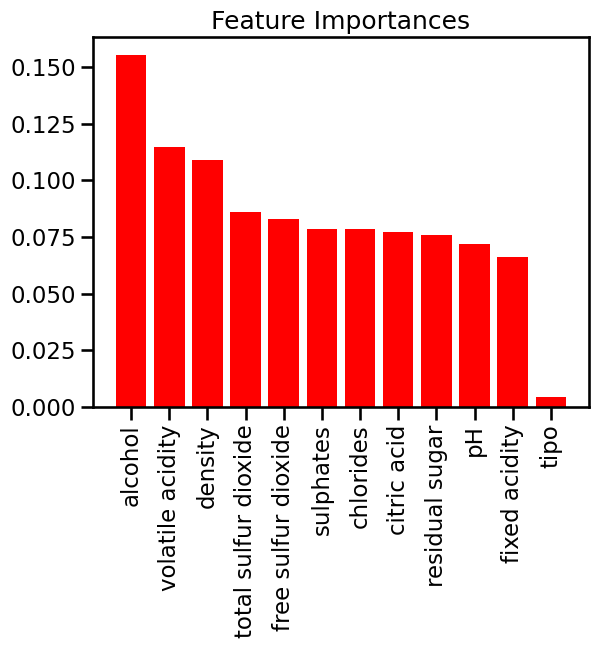

In [58]:
importances = model.feature_importances_

# Ordina l'importanza delle variabili in ordine decrescente:
# La riga seguente è un modo compatto per ottenere gli indici
# degli elementi in importanza ordinati dall'importanza più alta a quella più bassa.
indices = np.argsort(importances)[::-1]

# Riordiniamo i nomi delle variabili a seconda dell'importanza
sorted_feature_names = [feature_cols[i] for i in indices]

# Plot 
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
# Usiamo i nomi ordinati per il x-ticks
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Dato che la variabile *tipo* ha una importanza estremamente limitata la escludiamo dalle analisi di Lime e Shap.

In [59]:
X_train_std_def = X_train_std.copy()
X_test_std_def = X_test_std.copy()

X_train_std_def 
X_test_std_def


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,tipo
3103,-0.140867,-0.551718,0.919953,-0.691454,-0.296544,0.539018,0.033516,-1.364852,-0.366436,-0.305415,1.185452,1
1419,0.339152,-1.238304,2.904856,-0.841860,-0.425554,-0.205032,-0.233732,-1.041428,-0.929665,-0.880522,0.264291,1
4761,-0.780893,-1.175887,-0.312056,1.177876,-0.554564,0.882425,-0.002117,0.447670,-0.616760,-1.024299,-1.159320,1
4690,-0.380877,-1.113470,0.030168,1.500174,-0.554564,-0.720143,0.710542,0.663286,-2.118705,-1.168076,-1.243062,1
4032,-0.300874,-0.426884,-0.654281,2.638962,-0.580366,-0.834612,-0.002117,1.417942,-0.929665,0.054027,-1.075578,1
...,...,...,...,...,...,...,...,...,...,...,...,...
889,-0.540883,-0.239633,0.030168,-0.755913,-0.322346,0.195610,-0.465346,-0.957203,0.947766,1.132353,0.431775,1
2850,-0.380877,-0.614135,-0.175166,2.015852,-0.090128,1.397536,0.354212,1.246123,-1.179989,-0.017862,-1.243062,1
19,0.579162,-0.114799,1.330622,-0.798886,7.340840,-0.777377,-1.071107,0.744142,-1.117408,4.007889,-1.075578,0
300,0.259149,1.195956,-1.749400,-0.626994,0.761337,-0.605674,-1.284905,0.609382,1.010347,0.485357,0.180550,0


In [60]:
del X_train_std_def['tipo']
del X_test_std_def['tipo']

In [61]:
X_train_std_def
X_test_std_def

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3103,-0.140867,-0.551718,0.919953,-0.691454,-0.296544,0.539018,0.033516,-1.364852,-0.366436,-0.305415,1.185452
1419,0.339152,-1.238304,2.904856,-0.841860,-0.425554,-0.205032,-0.233732,-1.041428,-0.929665,-0.880522,0.264291
4761,-0.780893,-1.175887,-0.312056,1.177876,-0.554564,0.882425,-0.002117,0.447670,-0.616760,-1.024299,-1.159320
4690,-0.380877,-1.113470,0.030168,1.500174,-0.554564,-0.720143,0.710542,0.663286,-2.118705,-1.168076,-1.243062
4032,-0.300874,-0.426884,-0.654281,2.638962,-0.580366,-0.834612,-0.002117,1.417942,-0.929665,0.054027,-1.075578
...,...,...,...,...,...,...,...,...,...,...,...
889,-0.540883,-0.239633,0.030168,-0.755913,-0.322346,0.195610,-0.465346,-0.957203,0.947766,1.132353,0.431775
2850,-0.380877,-0.614135,-0.175166,2.015852,-0.090128,1.397536,0.354212,1.246123,-1.179989,-0.017862,-1.243062
19,0.579162,-0.114799,1.330622,-0.798886,7.340840,-0.777377,-1.071107,0.744142,-1.117408,4.007889,-1.075578
300,0.259149,1.195956,-1.749400,-0.626994,0.761337,-0.605674,-1.284905,0.609382,1.010347,0.485357,0.180550


# Lime

In [62]:
# Creiamo un ulteriore RandomForestClassifier che non ha la variabile 'tipo' per Lime

classifier_lime = RandomForestClassifier(random_state=42,n_jobs=-1)
classifier_lime.fit(X_train_std_def, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

## Local Explanation

In [63]:
# Creiamo un LIME Tabular Explainer

explainer = LimeTabularExplainer(X_train_std_def.values,
                                 feature_names=X_train_std_def.columns,
                                 class_names=['Bad','Good'],
                                 discretize_continuous=True,
                                 )


# Spiegiamo una previsione
i = 1
exp = explainer.explain_instance(X_test_std_def.iloc[i].values,
                                 classifier_lime.predict_proba,
                                 num_features=len(X_train_std_def.columns))

# Mostriamo la spiegazione
print("Instance:", i)
print("True class:", y_test.iloc[i])
exp.as_list()
exp.show_in_notebook(show_all=False)
exp.save_to_file('lime.html')

Instance: 1
True class: 1


# Shap

In [64]:
# Ulteriore RandomForestClassifier per Shap
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_std_def, y_train)

RandomForestClassifier(random_state=42)

In [65]:
# Spieghiamo le previsioni del modello usando SHAP
explainer_shap = shap.TreeExplainer(model)
shap_values = explainer_shap.shap_values(X_test_std_def)

In [66]:
# Ci servirà per il force_plot
feature_cols_4shap = [
  'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'
]

## Global Explanation

Nota: nei prossimi grafici la classe di riferimento è 1 = Good, quindi il base value corrisponderà alla prior P(Good)=0.6 circa.

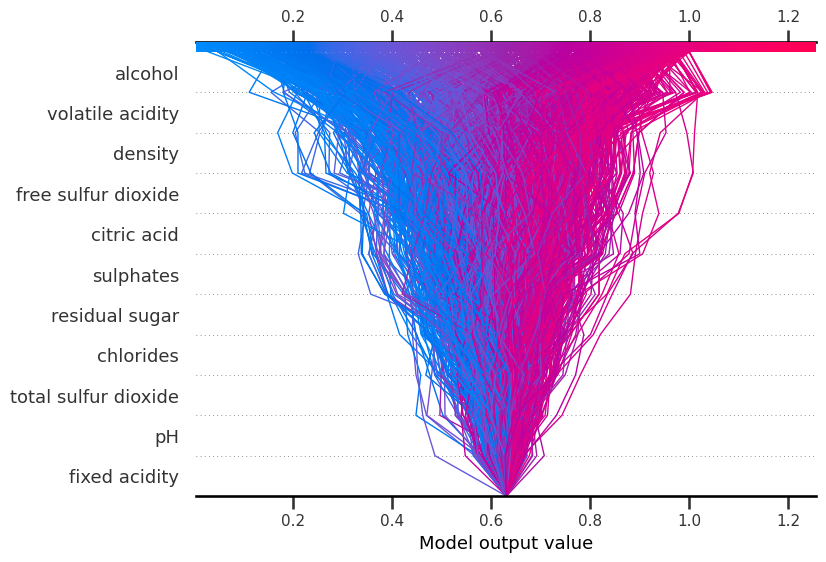

In [67]:
shap.decision_plot(explainer_shap.expected_value[1], shap_values[1], X_test_std_def)

### Summary Plot

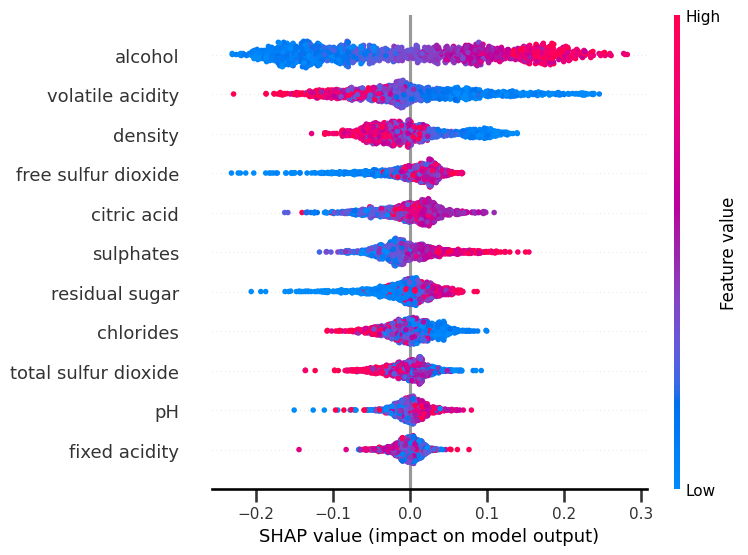

In [68]:
# Calcoliamo i valori SHAP per tutte le istanze nel dataset di test
shap_values = explainer_shap.shap_values(X_test_std_def)

# Utilizziamo la funzione summary_plot() per visualizzare i contributi di ciascuna variabile per tutte le istanze
shap.summary_plot(shap_values[1], X_test_std_def)

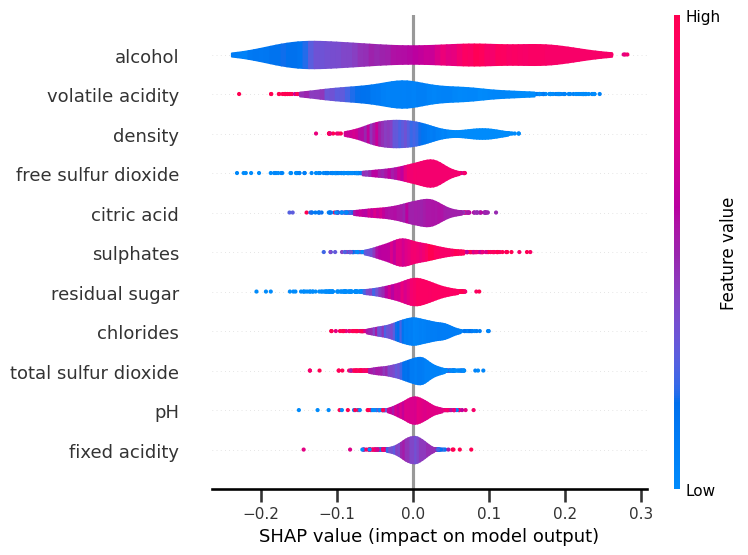

In [69]:
# Calcoliamo i valori SHAP per tutte le istanze nel dataset di test
shap_values = explainer_shap.shap_values(X_test_std_def)

# Utilizziamo la funzione summary_plot() per visualizzare i contributi di ciascuna variabile per tutte le istanze
shap.summary_plot(shap_values[1], X_test_std_def, plot_type="violin")

### Plot Dependece Plot

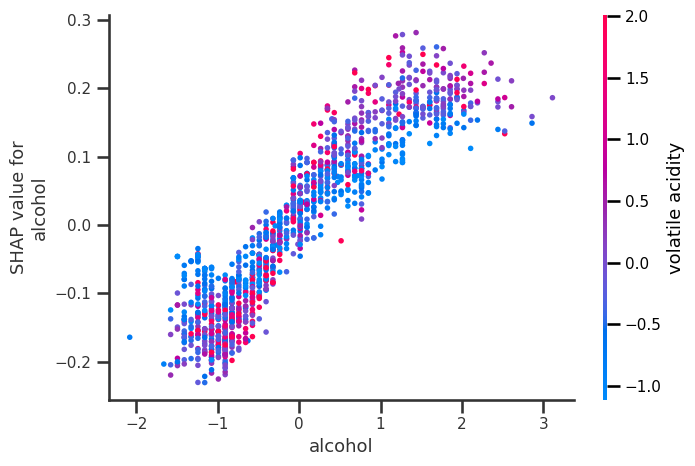

In [70]:
# Tracciamo il dependence_plot per una variabile specifica
shap.dependence_plot("alcohol",
                     shap_values[1],
                     X_test_std_def,
                     interaction_index = "volatile acidity")

### Decision Plot

Scegliamo un campione di 50 osservazioni per poter interpretare più chiaramente il decision_plot. 

In [71]:
X_test_std_def_sampled = X_test_std_def.sample(50)
shap_values_sampled = explainer_shap.shap_values(X_test_std_def_sampled)

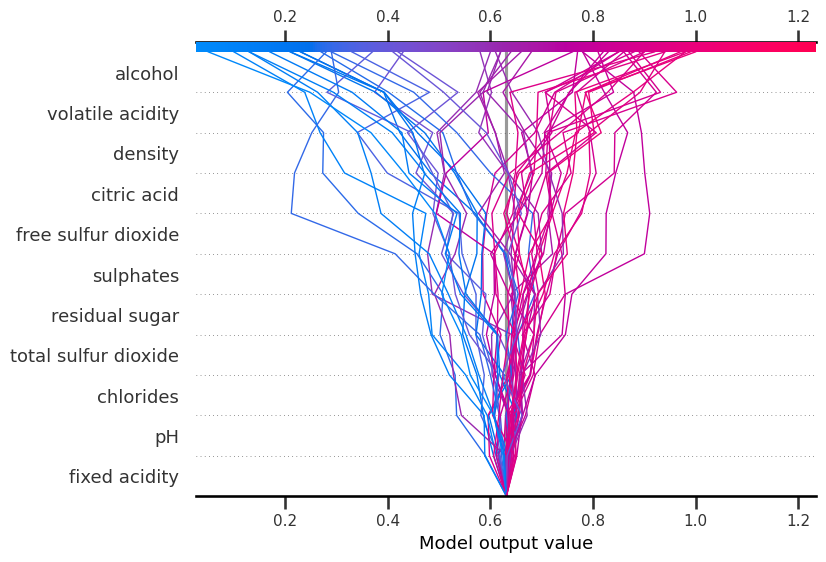

In [72]:
shap.decision_plot(explainer_shap.expected_value[1], shap_values_sampled[1], X_test_std_def_sampled)

## Local Explanation

### Shap Force Plot

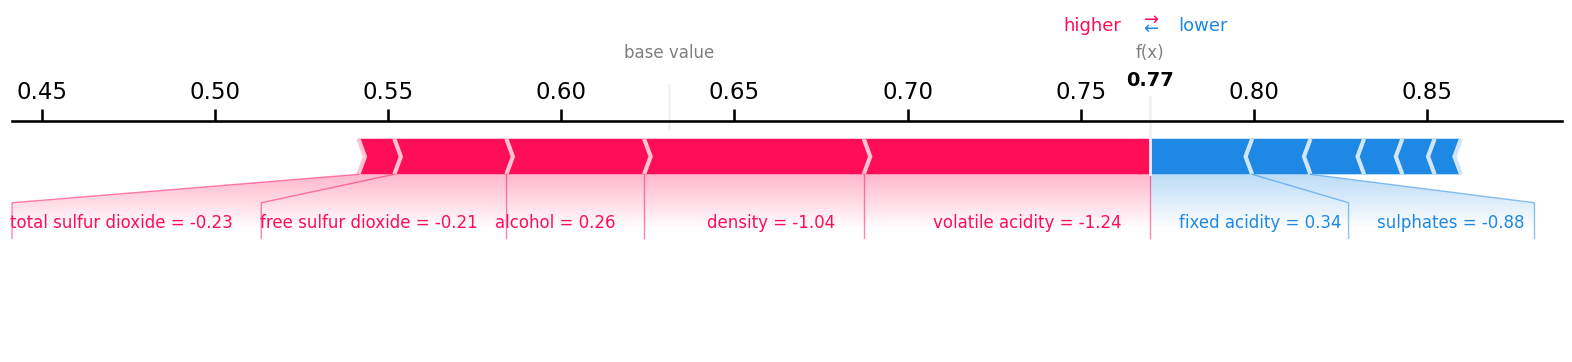

In [73]:
instance_index = 1

# Prevediamo le classi per le specifiche istanze
predicted_class = model.predict(X_test_std_def.iloc[instance_index:instance_index + 1])[0]

# Generiamo il SHAP force plot per la classe prevista della istanza specifica
shap.force_plot(explainer_shap.expected_value[predicted_class],
                shap_values[predicted_class][instance_index],
                features = X_test_std_def.iloc[instance_index].values.round(2),
                feature_names = feature_cols_4shap,
                matplotlib = True)